<a href="https://colab.research.google.com/github/vanshikapringle/SCT_DS_4/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Kaagle_Upload.csv')
df.head()

/tmp/ipython-input-4-3786030797.py:2: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Kaagle_Upload.csv')


accident_index  vehicle_reference  vehicle_type  towing_and_articulation  \
0  201506E098757                  2             9                        0   
1  201506E098766                  1             9                        0   
2  201506E098766                  2             9                        0   
3  201506E098777                  1            20                        0   
4  201506E098780                  1             9                        0   

   vehicle_manoeuvre  vehicle_location-restricted_lane  junction_location  \
0                 18                                 0                  8   
1                  9                                 0                  8   
2                 18                                 0                  8   
3                  4                                 0                  0   
4                 15                                 0                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_leaving_carriageway  ...  age_band_of_casualty  casualty_severity  \
0                            0  ...                   NaN                NaN   
1                            0  ...                   NaN                NaN   
2                            0  ...                   8.0                3.0   
3                            0  ...                   6.0                3.0   
4                            0  ...                   NaN                NaN   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                  NaN                  NaN            NaN   
1                  NaN                  NaN            NaN   
2                  0.0                  0.0            0.0   
3                  1.0                  1.0            0.0   
4                  NaN                  NaN            NaN   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                     NaN                                 NaN            NaN   
1                     NaN                                 NaN            NaN   
2                     0.0                                 0.0            9.0   
3                     0.0                                 0.0            0.0   
4                     NaN                                 NaN            NaN   

   casualty_home_area_type  casualty_imd_decile  
0                      NaN                  NaN  
1                      NaN                  NaN  
2                      1.0                  3.0  
3                      1.0                  1.0  
4                      NaN                  NaN  

[5 rows x 70 columns]

In [ ]:
def parse_excel_date(val):
    try:
        return pd.to_datetime(val, format='%d/%m/%Y')
    except:
        try:
            return pd.to_datetime('1899-12-30') + pd.to_timedelta(float(val), unit='D')
        except:
            return pd.NaT

df['ParsedDate'] = df['date'].apply(parse_excel_date)

In [ ]:
df['ParsedTime'] = pd.to_datetime(df['time'], errors='coerce').dt.time

In [ ]:
df['Datetime'] = pd.to_datetime(
    df['ParsedDate'].astype(str) + ' ' + df['ParsedTime'].astype(str),
    errors='coerce'
)

In [ ]:
df['Hour'] = df['Datetime'].dt.hour

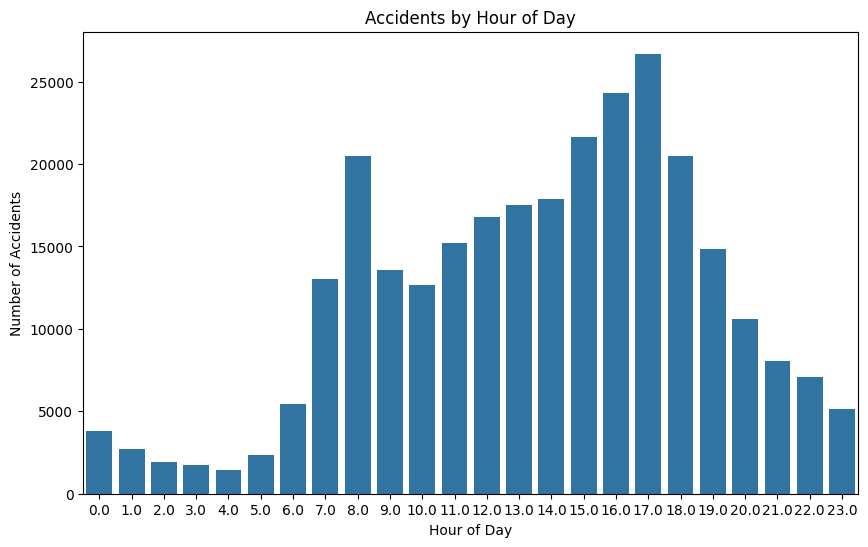

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

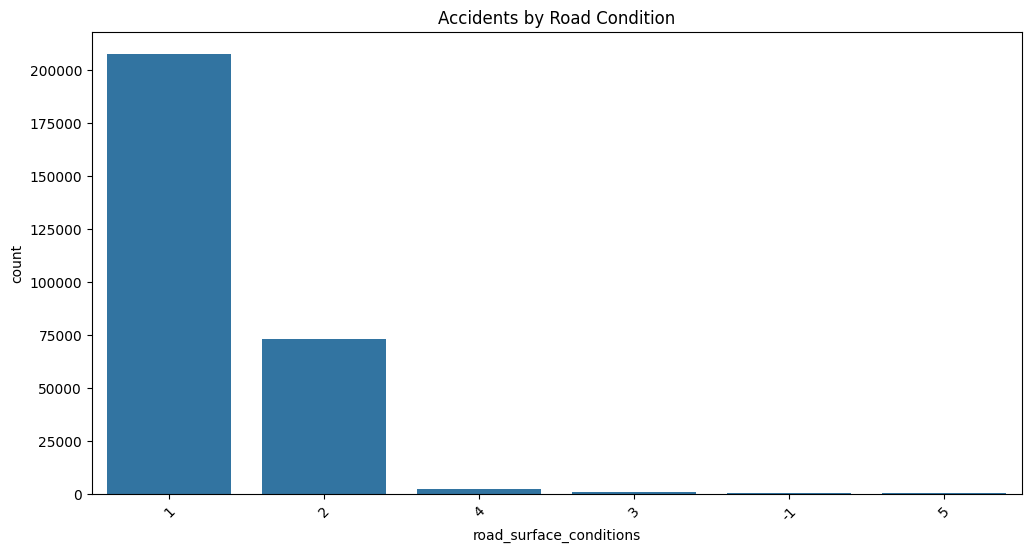

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='road_surface_conditions', order=df['road_surface_conditions'].value_counts().index)
plt.title('Accidents by Road Condition')
plt.xticks(rotation=45)
plt.show()

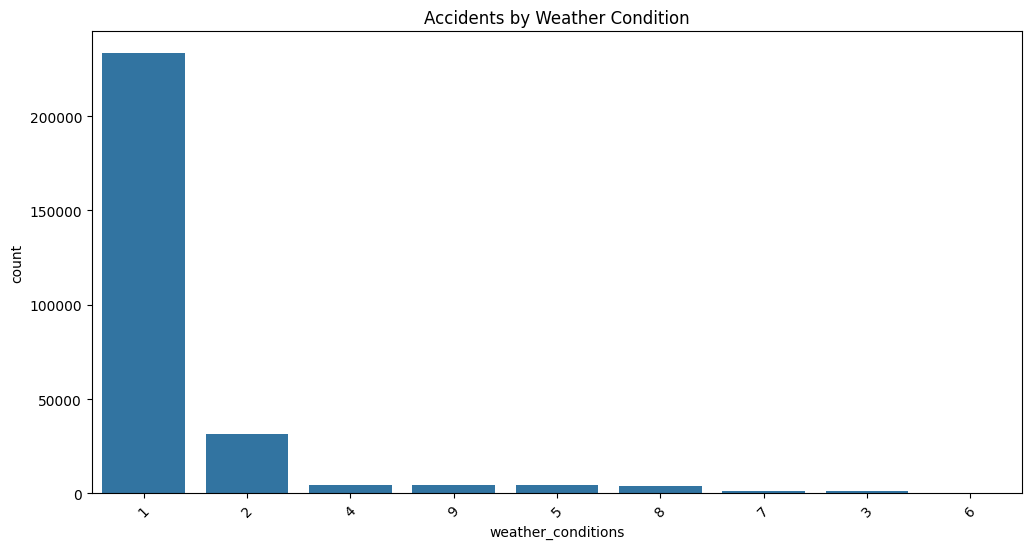

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='weather_conditions', order=df['weather_conditions'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df['Datetime'].head())
print("Missing datetimes:", df['Datetime'].isnull().sum())

0   2015-09-03 12:56:00
1   2015-03-14 15:55:00
2   2015-03-14 15:55:00
3   2015-11-03 10:15:00
4   2015-06-03 08:03:00
Name: Datetime, dtype: datetime64[ns]
Missing datetimes: 33


In [ ]:
df['Weekday'] = df['Datetime'].dt.day_name()
print(df['Weekday'].unique())

['Thursday' 'Saturday' 'Tuesday' 'Wednesday' 'Monday' 'Sunday' 'Friday'
 nan]


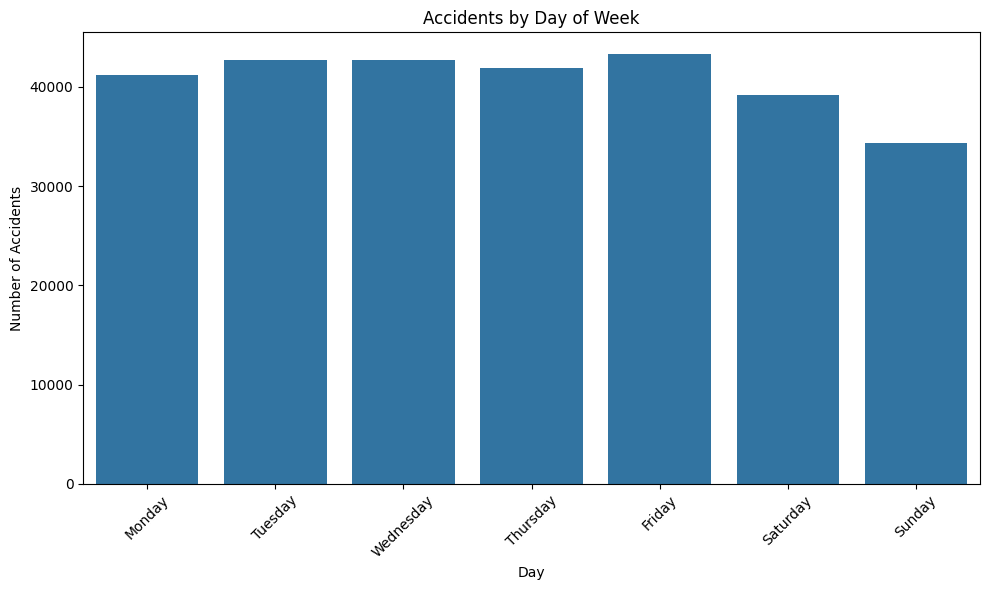

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.countplot(x='Weekday', data=df, order=order)
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install folium

import folium
from folium.plugins import HeatMap
df_map = df[['latitude', 'longitude']].dropna()
m = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()], zoom_start=10)

HeatMap(data=df_map.values, radius=8).add_to(m)

m

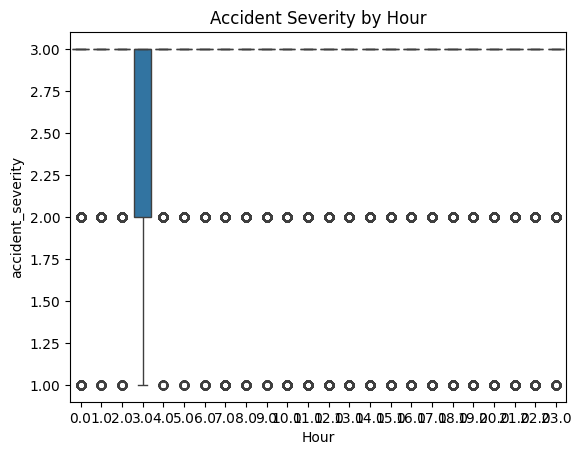

In [ ]:
sns.boxplot(data=df, x='Hour', y='accident_severity')
plt.title('Accident Severity by Hour')
plt.show()